In [1]:
import draw2Svg as dw

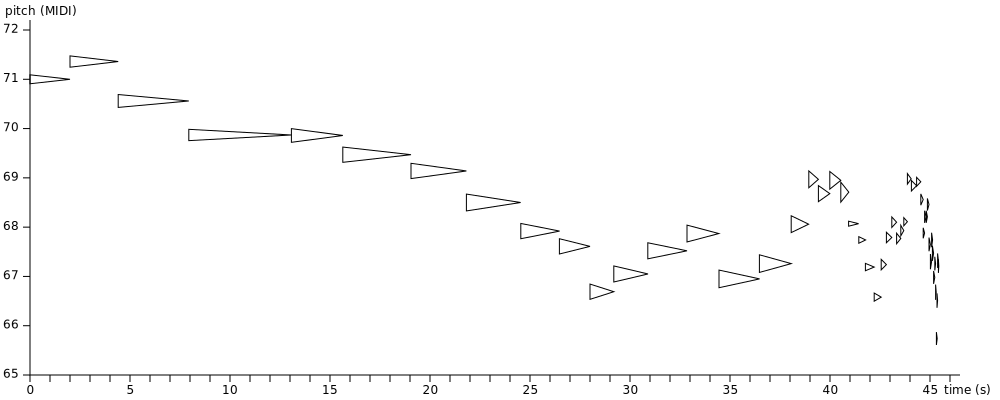

In [48]:
w,h = 1000,400
d = dw.Drawing(w,h)

xnum = 48 # posts (= one more than divisions)
ynum = 8
mleft = 30
mright = 30
mtop = 30
mbot = 25
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

exec(open('draw2Svg_funs.py').read())

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

def trishape(x,y,leng,height,c='black',f='none',**args):
    """triangular shape for a percussive tone.
    x,y is the middle of the left vertical line"""
    lines(x,y,x,y-height/2,x+leng,y,x,y+height/2,c=c,f=f,close=True,**args)

# values from the csound performance 
starts = [0.00, 2.00, 4.41, 7.94, 13.07, 15.64, 19.05, 21.82, 24.54, 26.47, 28.00, 29.19, 30.89, 32.85, 34.45, 36.47, 38.06, 38.94, 39.42, 39.99, 40.54, 40.93, 41.44, 41.77, 42.21, 42.56, 42.82, 43.09, 43.33, 43.54, 43.69, 43.87, 44.07, 44.33, 44.54, 44.66, 44.73, 44.81, 44.87, 44.95, 45.02, 45.08, 45.12, 45.18, 45.24, 45.28, 45.32, 45.35, 45.38, 45.42]
durs = [2.00, 2.41, 3.53, 5.13, 2.57, 3.41, 2.77, 2.71, 1.94, 1.53, 1.19, 1.71, 1.96, 1.59, 2.03, 1.59, 0.87, 0.48, 0.57, 0.55, 0.40, 0.50, 0.34, 0.44, 0.35, 0.26, 0.27, 0.24, 0.21, 0.15, 0.18, 0.19, 0.26, 0.21, 0.12, 0.07, 0.08, 0.06, 0.08, 0.07, 0.06, 0.05, 0.06, 0.06, 0.04, 0.03, 0.04, 0.03, 0.04, 0.02]
pchs = [71.00, 71.36, 70.56, 69.87, 69.86, 69.47, 69.14, 68.50, 67.92, 67.61, 66.69, 67.05, 67.52, 67.87, 66.95, 67.26, 68.06, 68.97, 68.68, 68.95, 68.71, 68.07, 67.74, 67.19, 66.58, 67.24, 67.79, 68.10, 67.77, 67.93, 68.11, 68.98, 68.84, 68.92, 68.56, 67.88, 68.21, 68.21, 68.46, 67.65, 67.30, 67.74, 67.47, 66.98, 67.26, 66.68, 65.74, 66.51, 67.32, 67.21]
dbs = [-20, -17, -15, -17, -14, -12, -12, -10, -12, -12, -12, -11, -11, -10, -9, -9, -10, -10, -11, -9, -6, -25, -23, -22, -21, -18, -18, -18, -18, -18, -21, -18, -18, -20, -17, -18, -16, -16, -16, -14, -12, -13, -12, -15, -14, -12, -15, -13, -13, -14]

pchmin = 65 #yrange(7)
pchmax = 72 #yrange(0)
dbmin = -25
dbmax = -6
startmax = 46.5
fontsiz = 12

# axes and ticks
lines(xgrid(0),20,xgrid(0),ygrid(7),xgrid(46.5),ygrid(7))
ticklen = 7
offset = 5
for i in range(ynum):
    tick(xgrid(0),ygrid(i),-ticklen)
    text('%d'%(72-i),xgrid(0)-ticklen-offset,ygrid(i)-2,fontsiz,text_anchor='end',valign='middle')
for i in range(xnum-1):
    tick(xgrid(i),ygrid(7),ticklen)
    if i%5==0: text('%d'%i,xgrid(i),ygrid(7)+ticklen,fontsiz,text_anchor='middle',valign='top')
text('pitch (MIDI)',5,15,fontsiz)
text('time (s)',xgrid(45.7),ygrid(7)+ticklen,fontsiz,valign='top')

# events
dbminleng = 5
dbmaxleng = 20
for i,start in enumerate(starts):
    db = dbs[i]
    dur = durs[i]
    pch = pchs[i]
    x = xgrid(start)
    y = scale(pch,65,72,ygrid(7),ygrid(0))
    leng = dur*xunit
    h = scale(db,dbmin,dbmax,dbminleng,dbmaxleng)
    trishape(x,y,leng,h)

#d.setPixelScale(1.2)
d.savePng('../../images/01-GS-10-c.png')
d

In [46]:
help(text)

Help on function text in module __main__:

text(txt='', x=10, y=10, fontsize=14, **args)
    wrapper for d.append(dw.Text(...))
    with fontsize set to 14 as default

